In [2]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

from varseek.utils import calculate_metrics, create_stratified_metric_bar_plot_updated, create_venn_diagram, draw_confusion_matrix, plot_overall_metrics, create_stratified_metric_line_plot, create_benchmarking_legend, print_json

In [3]:
tools = ["varseek", "gatk_mutect2", "gatk_haplotypecaller"]  # Ensure that any additional tools have columns DP_{tool} (int ≥ 0) AND/OR mutation_detected_{tool} (bool) in {simulated_data_output_dir}/unique_mcrs_df.csv for each tool TOOL
simulated_data_output_dir = '/home/jrich/data/varseek_data_fresh/manuscript_worthy/vk_sim_2024nov24_500000mcrs_k59_nov16'  # make sure this matches notebook 2
fig2_output_dir = '/home/jrich/data/varseek_data_fresh/manuscript_worthy/fig2_output'

In [ ]:
# import importlib
# import varseek.utils.visualization_utils
# importlib.reload(varseek.utils.visualization_utils)
# from varseek.utils.visualization_utils import create_stratified_metric_bar_plot_updated

# Make sure to change parameters and paths appropriately in 1_1, 2, and 2_2

# Make vk index if not created already - run notebook 1_1

In [ ]:
if not os.path.exists("1_1_variant_detection_reference_building_fig2.ipynb"):
    run_index_creation_command = "jupyter nbconvert --to notebook --execute --output 1_1_variant_detection_reference_building_fig2.ipynb 1_1_variant_detection_reference_building.ipynb"
    subprocess.run(run_index_creation_command, shell=True)

# Create simulated data with vk sim and run variant screening with vk - 2

In [ ]:
if not os.path.exists("2_variant_simulation_fig2.ipynb"):
    run_simulated_data_creation_and_vk_screening_command = "jupyter nbconvert --to notebook --execute --output 2_variant_simulation_fig2.ipynb 2_variant_simulation.ipynb"
    subprocess.run(run_simulated_data_creation_and_vk_screening_command, shell=True)

# Run variant calling with GATK (haplotypecaller and mutect2)

In [ ]:
if not os.path.exists("2_2_gatk_workflow.ipynb"):
    run_simulated_data_creation_and_vk_screening_command = "jupyter nbconvert --to notebook --execute --output 2_2_gatk_workflow_fig2.ipynb 2_2_gatk_workflow.ipynb"
    subprocess.run(run_simulated_data_creation_and_vk_screening_command, shell=True)

# Generate plots for Fig 2

In [ ]:
os.makedirs(fig2_output_dir, exist_ok=True)

unique_mcrs_df_path = os.path.join(simulated_data_output_dir, 'unique_mcrs_df.csv')
unique_mcrs_df = pd.read_csv(unique_mcrs_df_path)
unique_mcrs_df.columns = unique_mcrs_df.columns.str.replace("_vk", "_varseek", regex=False)  # replace _vk with _varseek

read_df_path = os.path.join(simulated_data_output_dir, 'read_df.csv')
read_df = pd.read_csv(read_df_path)

In [ ]:
metric_dictionary_reads_vk = calculate_metrics(read_df, header_name = "read_header", suffix="_varseek", out = f"{fig2_output_dir}/read_metrics_varseek.txt")
draw_confusion_matrix(metric_dictionary_reads_vk, suffix="_varseek")
# create_stratified_metric_bar_plot(read_df, 'mcrs_mutation_type', 'accuracy', overall_metric = metric_dictionary_reads['accuracy'], log_x_axis = False, display_numbers = True, out_path = f"{fig2_output_dir}/accuracy_vs_mcrs_mutation_type_read_perspective.pdf")

In [4]:
#!!! TEMP random data for testing
import random
random.seed(42)

# Define the number of rows
num_rows = 500  # Number of rows for the DataFrame

# Generate unique mcrs_id values
mcrs_ids = [f"mcrs_{i}" for i in range(1, num_rows + 1)]

# Define the column names
columns = [
    "mcrs_id",
    "mcrs_header",
    "TP_varseek",
    "FP_varseek",
    "TN_varseek",
    "FN_varseek",
    "TP_gatk_mutect2",
    "FP_gatk_mutect2",
    "TN_gatk_mutect2",
    "FN_gatk_mutect2",
    "TP_gatk_haplotypecaller",
    "FP_gatk_haplotypecaller",
    "TN_gatk_haplotypecaller",
    "FN_gatk_haplotypecaller",
    "mcrs_mutation_type",
    "kmer_overlap_in_mcrs_reference",
    "distance_to_nearest_splice_junction",
    "is_near_splice_junction_10",
    "triplet_complexity",
    "longest_homopolymer_length",
    "any_noisy_reads",
    "tumor_purity",
    "number_of_reads_mutant",
    "number_of_reads_wt",
    "mutation_expression_prediction_error_varseek",
    "mutation_expression_prediction_error_gatk_haplotypecaller",
    "mutation_expression_prediction_error_gatk_mutect2",
    "included_in_synthetic_reads_mutant",
    "mutation_detected_varseek",
    "mutation_detected_gatk_mutect2",
    "mutation_detected_gatk_haplotypecaller"
]

# Generate random data for the DataFrame
data = []
mcrs_mutation_types = ["substitution", "insertion", "deletion", "delins", "duplication", "inversion", "mixed"]
mutant_sequencing_depth = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 256]
wt_sequencing_depth = [0, 1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 256]

for mcrs_id in mcrs_ids:
    selected_varseek = random.choice(["TP", "FP", "TN", "FN"])
    if selected_varseek == "TP" or selected_varseek == "FN":
        selected_gatk_mutect2 = random.choice(["TP", "FN"])
        selected_gatk_haplotypecaller = random.choice(["TP", "FN"])
    else:
        selected_gatk_mutect2 = random.choice(["FP", "TN"])
        selected_gatk_haplotypecaller = random.choice(["FP", "TN"])
    if selected_varseek == "TP" or selected_varseek == "FP":
        mutation_detected_varseek = True
    else:
        mutation_detected_varseek = False
    if selected_gatk_mutect2 == "TP" or selected_gatk_mutect2 == "FP":
        mutation_detected_gatk_mutect2 = True
    else:
        mutation_detected_gatk_mutect2 = False
    if selected_gatk_haplotypecaller == "TP" or selected_gatk_haplotypecaller == "FP":
        mutation_detected_gatk_haplotypecaller = True
    else:
        mutation_detected_gatk_haplotypecaller = False
    number_of_mutant_reads = random.choice(mutant_sequencing_depth)
    
    row = [
        mcrs_id,
        mcrs_id + "_header",
        selected_varseek == "TP",  # TP_varseek
        selected_varseek == "FP",  # FP_varseek
        selected_varseek == "TN",  # TN_varseek
        selected_varseek == "FN",  # FN_varseek
        selected_gatk_mutect2 == "TP",  # TP_gatk_mutect2
        selected_gatk_mutect2 == "FP",  # FP_gatk_mutect2
        selected_gatk_mutect2 == "TN",  # TN_gatk_mutect2
        selected_gatk_mutect2 == "FN",  # FN_gatk_mutect2
        selected_gatk_haplotypecaller == "TP",  # TP_gatk_haplotypecaller
        selected_gatk_haplotypecaller == "FP",  # FP_gatk_haplotypecaller
        selected_gatk_haplotypecaller == "TN",  # TN_gatk_haplotypecaller
        selected_gatk_haplotypecaller == "FN",  # FN_gatk_haplotypecaller
        random.choice(mcrs_mutation_types),  # mcrs_mutation_type
        random.choice([True, False]),  # kmer_overlap_in_mcrs_reference
        random.randint(0, 100),  # distance_to_nearest_splice_junction
        random.choice([True, False]),  # is_near_splice_junction_10
        round(random.uniform(0, 1), 3),  # triplet_complexity
        random.randint(0, 20),  # longest_homopolymer_length
        random.choice([True, False]),  # any_noisy_reads
        round(random.uniform(0, 1), 1),  # tumor_purity
        number_of_mutant_reads,  # number_of_reads_mutant
        random.choice(wt_sequencing_depth),  # number_of_reads_wt
        random.randint(-100, 100),  # mutation_expression_prediction_error_varseek
        random.randint(-100, 100),  # mutation_expression_prediction_error_gatk_haplotypecaller
        random.randint(-100, 100),  # mutation_expression_prediction_error_gatk_mutect2
        number_of_mutant_reads > 0,  # included_in_synthetic_reads_mutant
        mutation_detected_varseek,  # mutation_detected_varseek
        mutation_detected_gatk_mutect2,  # mutation_detected_gatk_mutect2
        mutation_detected_gatk_haplotypecaller  # mutation_detected_gatk_haplotypecaller
    ]
    data.append(row)

# Create the DataFrame
unique_mcrs_df = pd.DataFrame(data, columns=columns)

In [ ]:
# from varseek.utils import vcf_to_dataframe

# df_mut = vcf_to_dataframe("/home/jrich/data/varseek_data/trash/gatk_nov17/vcfs/mutect2/mutect2_output_filtered.vcf.gz", additional_columns = True)

In [5]:
# Ensure that any additional tools have columns DP_{tool} (int ≥ 0) in {simulated_data_output_dir}/unique_mcrs_df.csv for each tool TOOL
if 'included_in_synthetic_reads_mutant' not in unique_mcrs_df.columns:
    unique_mcrs_df['included_in_synthetic_reads_mutant'] = unique_mcrs_df['number_of_reads_mutant'] > 0

for tool in tools:
    assert f'DP_{tool}' in unique_mcrs_df.columns or f'mutation_detected_{tool}' in unique_mcrs_df.columns, f"DP_{tool} or mutation_detected_{tool} must be in unique_mcrs_df.columns"
    if f'mutation_detected_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'mutation_detected_{tool}'] = unique_mcrs_df[f'DP_{tool}'] > 0
    if f'TP_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'TP_{tool}'] = (unique_mcrs_df['included_in_synthetic_reads_mutant'] & unique_mcrs_df[f'mutation_detected_{tool}'])
    if f'TN_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'TN_{tool}'] = (~unique_mcrs_df['included_in_synthetic_reads_mutant'] & ~unique_mcrs_df[f'mutation_detected_{tool}'])
    if f'FP_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'FP_{tool}'] = (~unique_mcrs_df['included_in_synthetic_reads_mutant'] & unique_mcrs_df[f'mutation_detected_{tool}'])
    if f'FN_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'FN_{tool}'] = (unique_mcrs_df['included_in_synthetic_reads_mutant'] & ~unique_mcrs_df[f'mutation_detected_{tool}'])
    if f'mutation_expression_prediction_error_{tool}' not in unique_mcrs_df.columns:
        unique_mcrs_df[f'mutation_expression_prediction_error_{tool}'] = unique_mcrs_df[f'DP_{tool}'] - unique_mcrs_df['number_of_reads_mutant']

In [6]:
metric_dict_collection = OrderedDict()
for tool in tools:
    print(tool)
    metric_dict_collection[tool] = calculate_metrics(unique_mcrs_df, header_name = "mcrs_header", suffix=f"_{tool}", out = f"{fig2_output_dir}/reference_metrics_{tool}.txt")
    draw_confusion_matrix(metric_dict_collection[tool], title = f"Confusion Matrix for {tool}")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------")

varseek
TP: 122, FP: 132, FN: 122, TN: 124
Accuracy: 0.492, Sensitivity: 0.5, Specificity: 0.484375
Mean Expression Error: -0.184, Median Expression Error: 2.5, Mean Magnitude Expression Error: 49.488, Median Magnitude Expression Error: 48.0


                Confusion Matrix for varseek                 
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃                 ┃ Predicted Positive ┃ Predicted Negative ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Actual Positive │        122         │        122         │
│ Actual Negative │        132         │        124         │
└─────────────────┴────────────────────┴────────────────────┘

-------------------------------------------------------------------------------------------------------------------------------------------------------
gatk_mutect2
TP: 123, FP: 122, FN: 121, TN: 134
Accuracy: 0.514, Sensitivity: 0.5040983606557377, Specificity: 0.5234375
Mean Expression Error: -0.334, Median Expression Error: -1.0, Mean Magnitude Expression Error: 49.506, Median Magnitude Expression Error: 50.0


              Confusion Matrix for gatk_mutect2              
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃                 ┃ Predicted Positive ┃ Predicted Negative ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Actual Positive │        123         │        121         │
│ Actual Negative │        122         │        134         │
└─────────────────┴────────────────────┴────────────────────┘

-------------------------------------------------------------------------------------------------------------------------------------------------------
gatk_haplotypecaller
TP: 115, FP: 144, FN: 129, TN: 112
Accuracy: 0.454, Sensitivity: 0.4713114754098361, Specificity: 0.4375
Mean Expression Error: 3.16, Median Expression Error: 4.5, Mean Magnitude Expression Error: 51.184, Median Magnitude Expression Error: 52.0


          Confusion Matrix for gatk_haplotypecaller          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃                 ┃ Predicted Positive ┃ Predicted Negative ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Actual Positive │        115         │        129         │
│ Actual Negative │        144         │        112         │
└─────────────────┴────────────────────┴────────────────────┘

-------------------------------------------------------------------------------------------------------------------------------------------------------


# Create legend

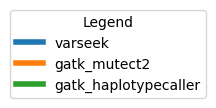

In [6]:
create_benchmarking_legend(tools, f"{fig2_output_dir}/legend.pdf")

# Bar plot of various metrics

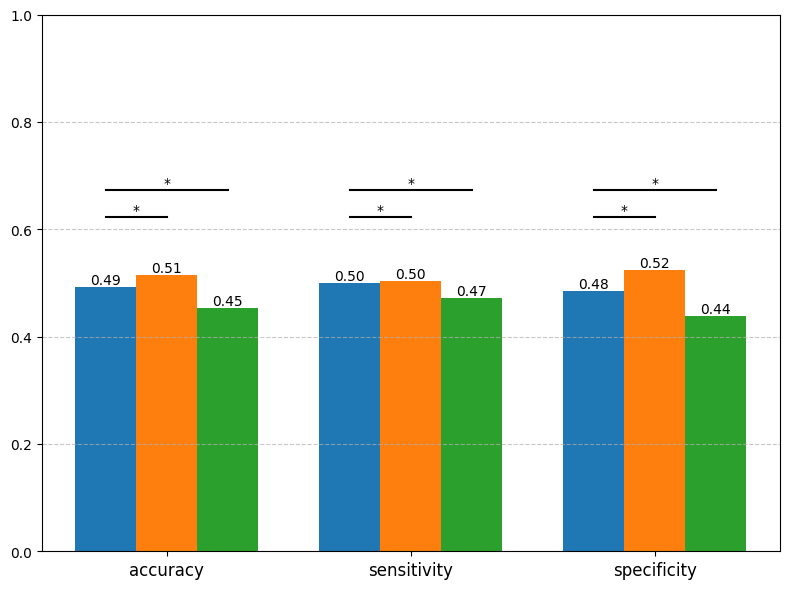

{
    "accuracy": {
        "gatk_mutect2": 1.0,
        "gatk_haplotypecaller": 1.0
    },
    "sensitivity": {
        "gatk_mutect2": 1.0,
        "gatk_haplotypecaller": 1.0
    },
    "specificity": {
        "gatk_mutect2": 1.0,
        "gatk_haplotypecaller": 1.0
    }
}


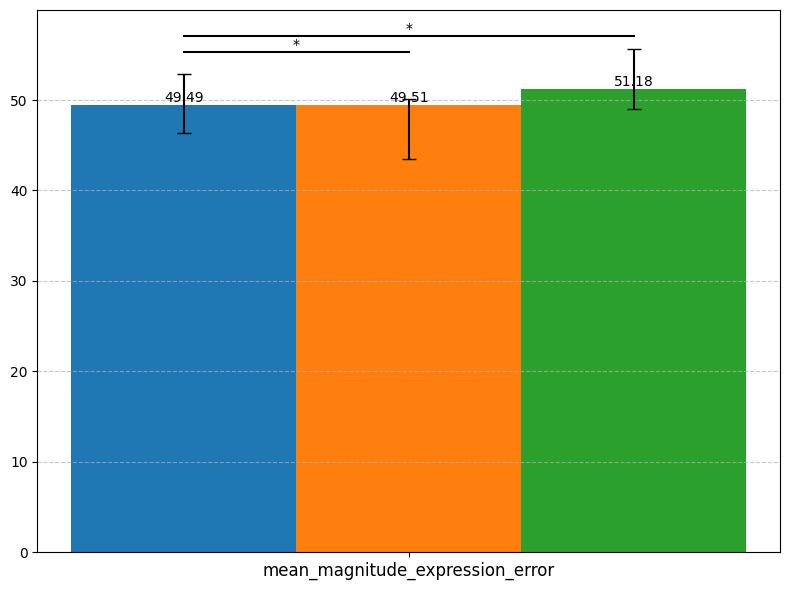

{
    "mean_magnitude_expression_error": {
        "gatk_mutect2": 0.47564428067383663,
        "gatk_haplotypecaller": 0.5272979649405886
    }
}


In [29]:
# plot_overall_metrics(metric_dict_collection, primary_metrics = ["accuracy", "sensitivity", "specificity"], secondary_metric = "mean_magnitude_expression_error", display_numbers=True, output_file = f"{fig2_output_dir}/overall_metrics.pdf")
plot_overall_metrics(metric_dict_collection, primary_metrics = ["accuracy", "sensitivity", "specificity"], display_numbers=True, show_p_values = False, unique_mcrs_df = unique_mcrs_df, output_file = f"{fig2_output_dir}/overall_metrics_acc_sens_spec.pdf", output_file_p_values = f"{fig2_output_dir}/overall_metrics_acc_sens_spec_p_values.json", bonferroni=True)  # to plot in separate plots
# print_json(f"{fig2_output_dir}/overall_metrics_acc_sens_spec_p_values.json")

plot_overall_metrics(metric_dict_collection, primary_metrics = "mean_magnitude_expression_error", display_numbers=True, show_p_values = False, unique_mcrs_df = unique_mcrs_df, output_file = f"{fig2_output_dir}/overall_metrics_error.pdf", output_file_p_values = f"{fig2_output_dir}/overall_metrics_expression_error_p_values.json", bonferroni=True, filter_real_negatives = True)  # to plot in separate plots
# print_json(f"{fig2_output_dir}/overall_metrics_expression_error_p_values.json")

# Stratified metric line plot of all 3 methods: sensitivity vs mutant read depth

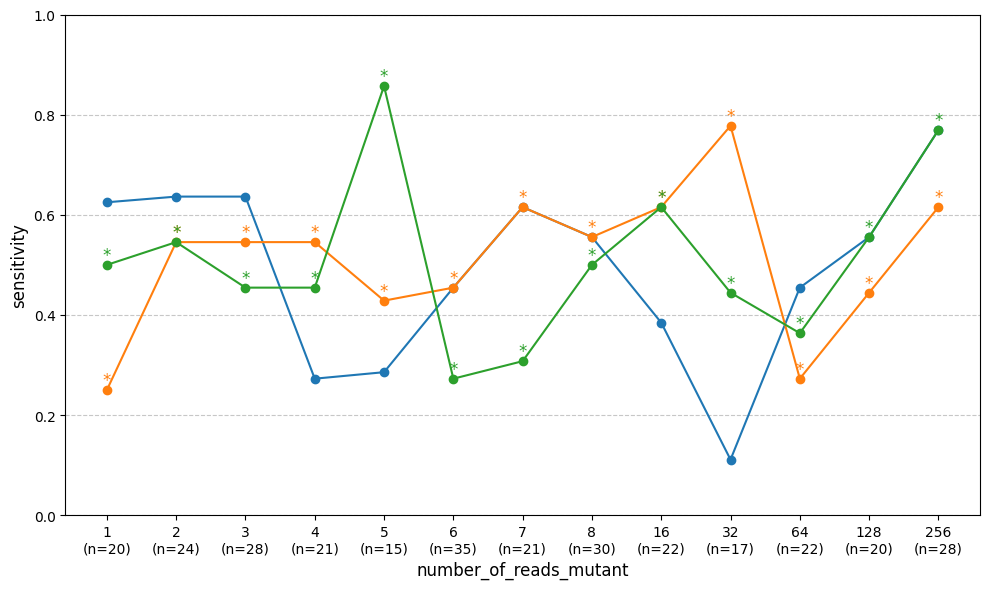

In [33]:
x_stratification = "number_of_reads_mutant"
y_metric = "sensitivity"
create_stratified_metric_line_plot(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric line plot of all 3 methods: sensitivity vs tumor purity

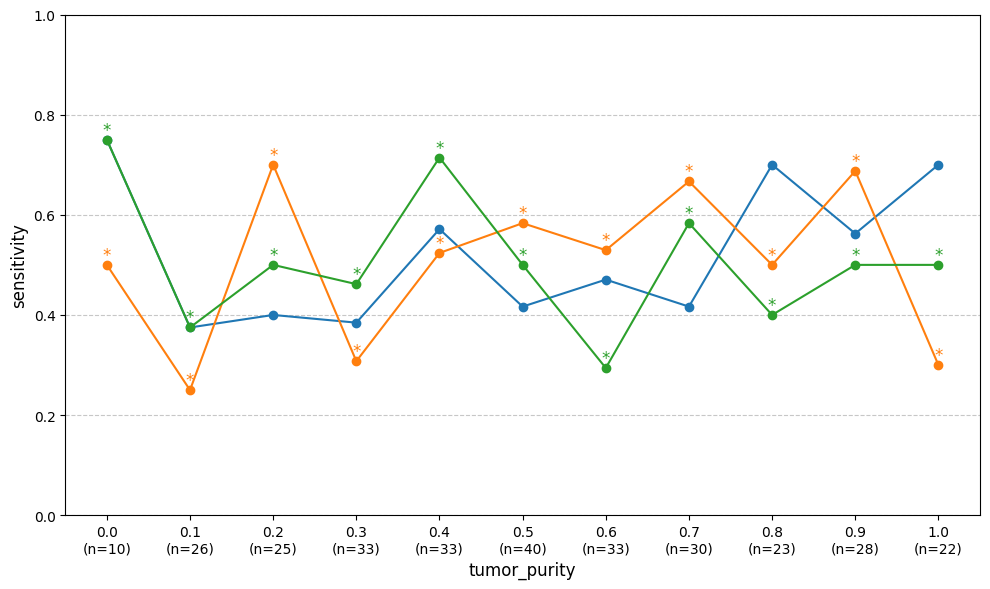

In [34]:
x_stratification = "tumor_purity"
y_metric = "sensitivity"
bins = None  # bins = [0, 0.25, 0.5, 0.75, 1]  # [-float('inf'), 0.25, 0.5, 0.75, float('inf')]  # absolute lower bound, midpoint1, midpoint2, ..., absolute upper bound - eg bins [0, 0.25, 0.5, 0.75, 1] --> labels ["[0, 0.25)", "[0.25, 0.5)", "[0.5, 0.75)", "[0.75, 1)"] - if absolute lower bound provided is less than real absolute lower bound, then just use -float(inf) and it is replaced internally (and same for upper)
create_stratified_metric_line_plot(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, bins = bins, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric line plot of all 3 methods: specificity vs tumor purity

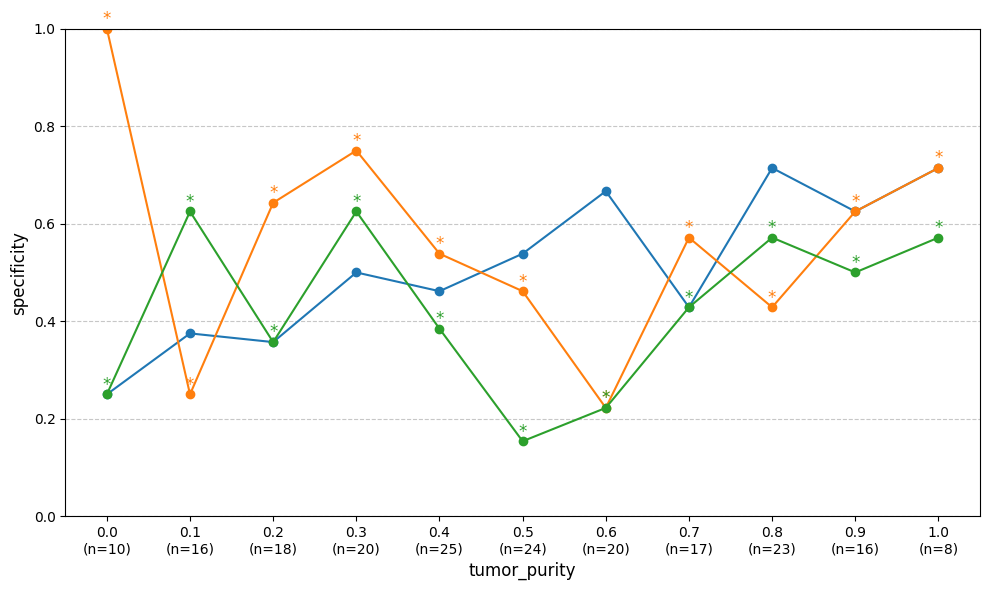

In [35]:
x_stratification = "tumor_purity"
y_metric = "specificity"
create_stratified_metric_line_plot(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric line plot of all 3 methods: mean_magnitude_expression_error vs mutant sequencing depth

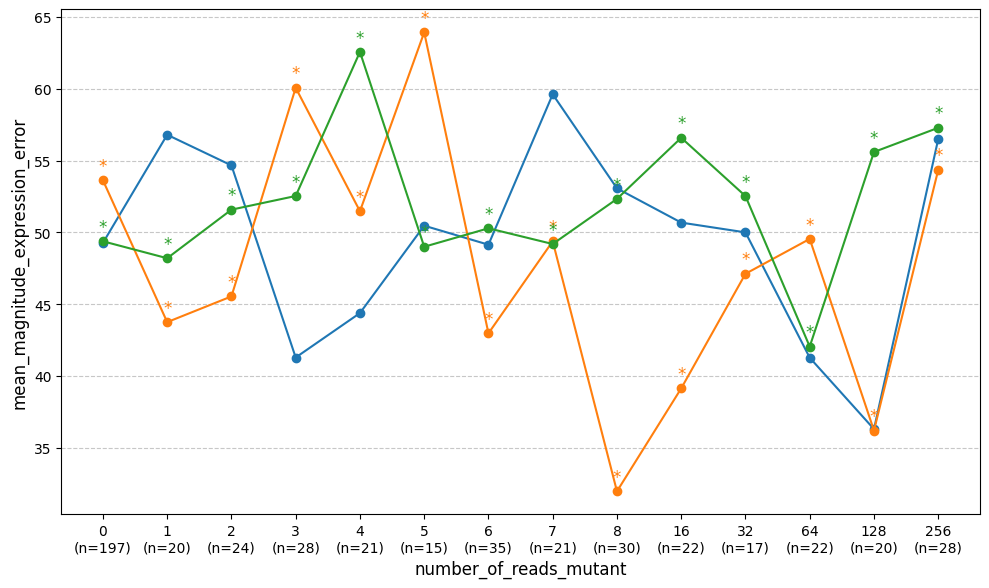

In [36]:
x_stratification = "number_of_reads_mutant"
y_metric = "mean_magnitude_expression_error"  # mean_magnitude_expression_error or mean_expression_error
filter_real_negatives = False  # set this to True when y_metric is expression error for all cases besides x_stratification = "number_of_reads_mutant", as we are not interested in the vast majority of cases that are real 0 and predicted 0
create_stratified_metric_line_plot(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, filter_real_negatives = filter_real_negatives, show_p_values = False, show_confidence_intervals = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric bar plot of all 3 methods: sensitivity vs mutation type

In [46]:
import importlib
import varseek.utils.visualization_utils
importlib.reload(varseek.utils.visualization_utils)
from varseek.utils.visualization_utils import create_stratified_metric_bar_plot_updated

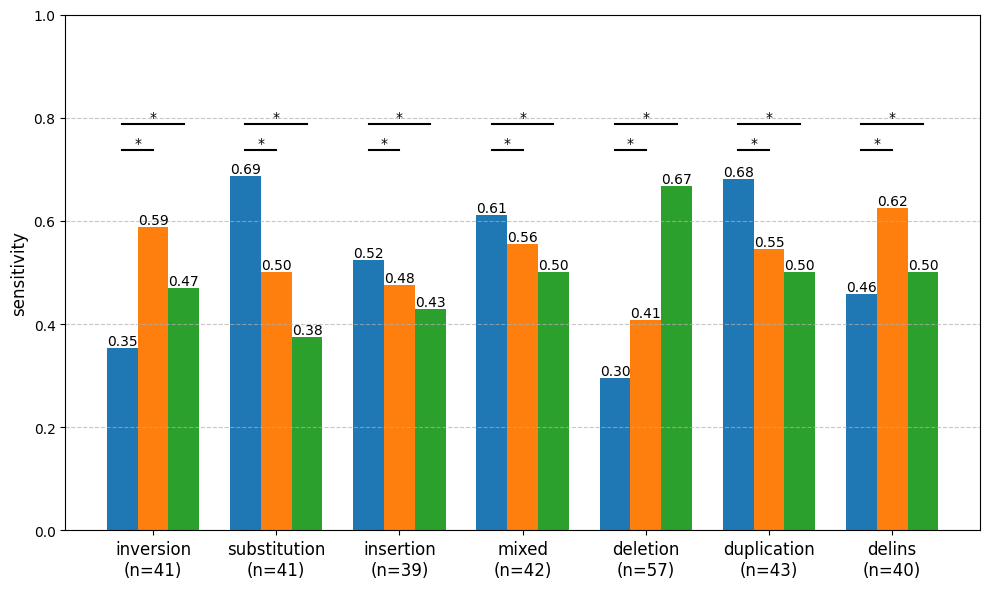

In [47]:
x_stratification = "mcrs_mutation_type"
y_metric = "sensitivity"
create_stratified_metric_bar_plot_updated(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, display_numbers = True, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric bar plot of all 3 methods: specificity vs mutation type

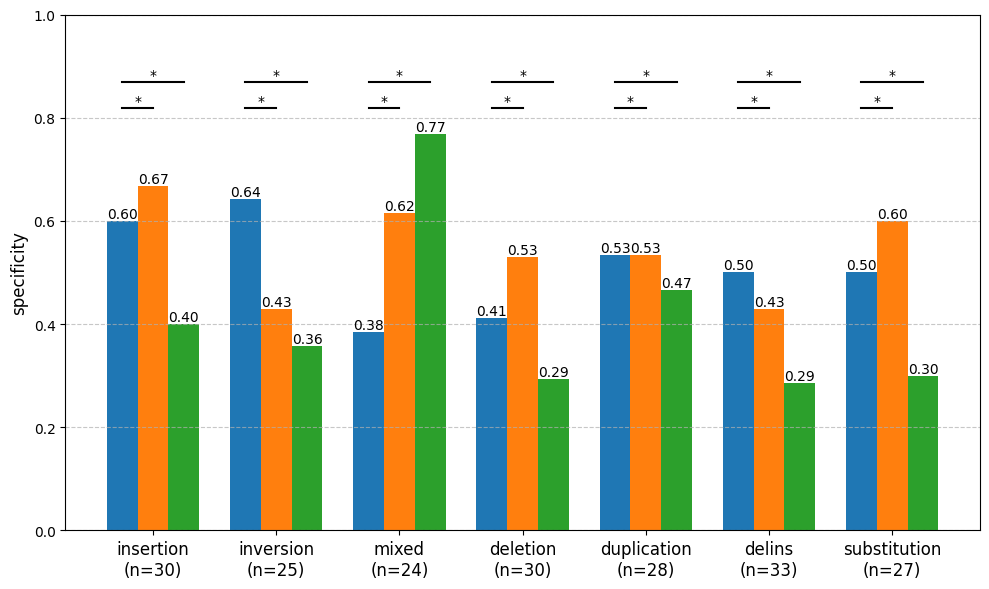

In [48]:
x_stratification = "mcrs_mutation_type"
y_metric = "specificity"
create_stratified_metric_bar_plot_updated(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, display_numbers = True, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric bar plot of all 3 methods: mean mutation expression error vs mutation type

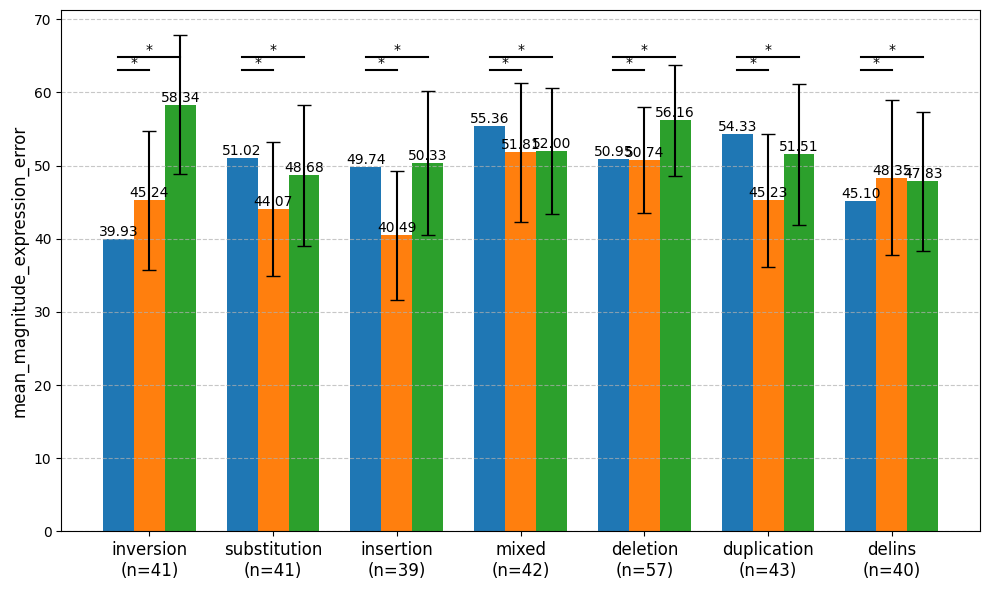

In [49]:
x_stratification = "mcrs_mutation_type"
y_metric = "mean_magnitude_expression_error"  # mean_magnitude_expression_error or mean_expression_error
filter_real_negatives = True
create_stratified_metric_bar_plot_updated(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, display_numbers = True, show_p_values = False, filter_real_negatives = filter_real_negatives, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric line plot of all 3 methods: sensitivity vs splice distance

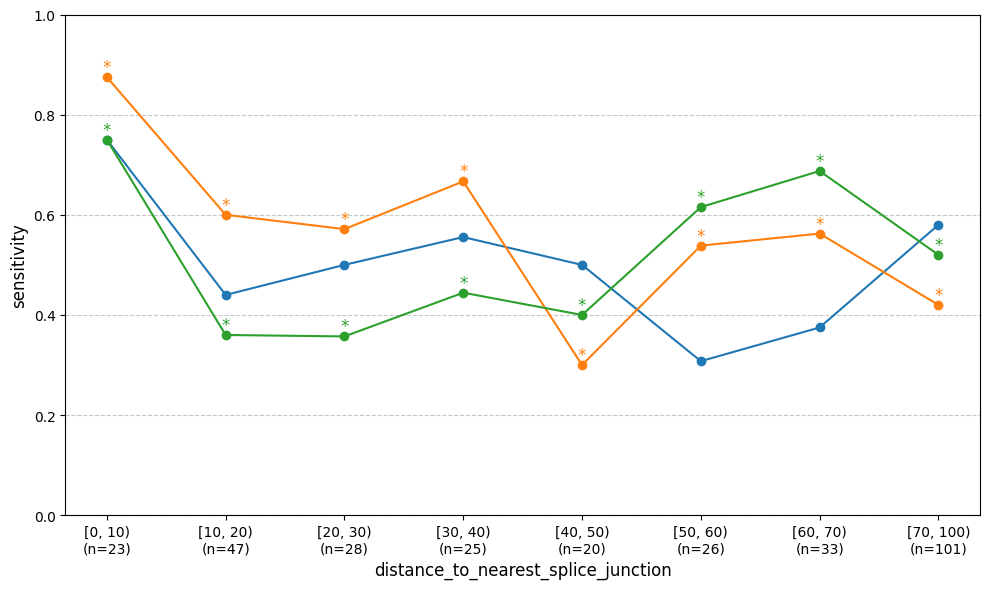

In [40]:
import importlib
import varseek.utils.visualization_utils
importlib.reload(varseek.utils.visualization_utils)
from varseek.utils.visualization_utils import create_stratified_metric_line_plot

x_stratification = "distance_to_nearest_splice_junction"
y_metric = "sensitivity"
bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]  # [-float('inf'), 0.25, 0.5, 0.75, float('inf')]  # absolute lower bound, midpoint1, midpoint2, ..., absolute upper bound - eg bins [0, 0.25, 0.5, 0.75, 1] --> labels ["[0, 0.25)", "[0.25, 0.5)", "[0.5, 0.75)", "[0.75, 1)"] - if absolute lower bound provided is less than real absolute lower bound, then just use -float(inf) and it is replaced internally (and same for upper)
create_stratified_metric_line_plot(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, bins = bins, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

# Stratified metric line plot of all 3 methods: specificity vs splice distance

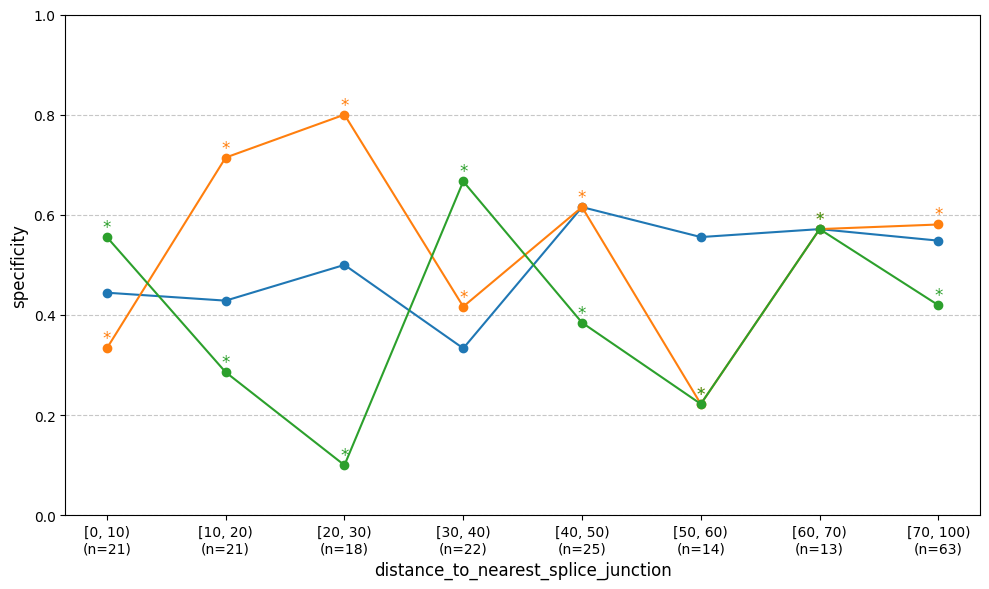

In [41]:
x_stratification = "distance_to_nearest_splice_junction"
y_metric = "specificity"
bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]  # [-float('inf'), 0.25, 0.5, 0.75, float('inf')]  # absolute lower bound, midpoint1, midpoint2, ..., absolute upper bound - eg bins [0, 0.25, 0.5, 0.75, 1] --> labels ["[0, 0.25)", "[0.25, 0.5)", "[0.5, 0.75)", "[0.75, 1)"] - if absolute lower bound provided is less than real absolute lower bound, then just use -float(inf) and it is replaced internally (and same for upper)
create_stratified_metric_line_plot(unique_mcrs_df, tools = tools, x_stratification = x_stratification, y_metric = y_metric, bins = bins, show_p_values = False, output_file = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}.pdf", output_file_p_values = f"{fig2_output_dir}/{y_metric}_vs_{x_stratification}_p_values.txt")

In [57]:
isinstance(["abs"], str) and os.isdir(["abs"])

False

In [55]:
os.path.isdir("/home/jrich/data/varseek_data/sequencing/sc/melanoma_10x/10k_Human_DTC_Melanoma_3p_nextgem_fastqs/gex")

True